In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv('master.csv')

In [4]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


우리의 데이터에 어떻게 통합된 유형의 국가가 변해하는지 살펴보겠습니다.

In [5]:
unique_country=dataset['country'].unique()
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

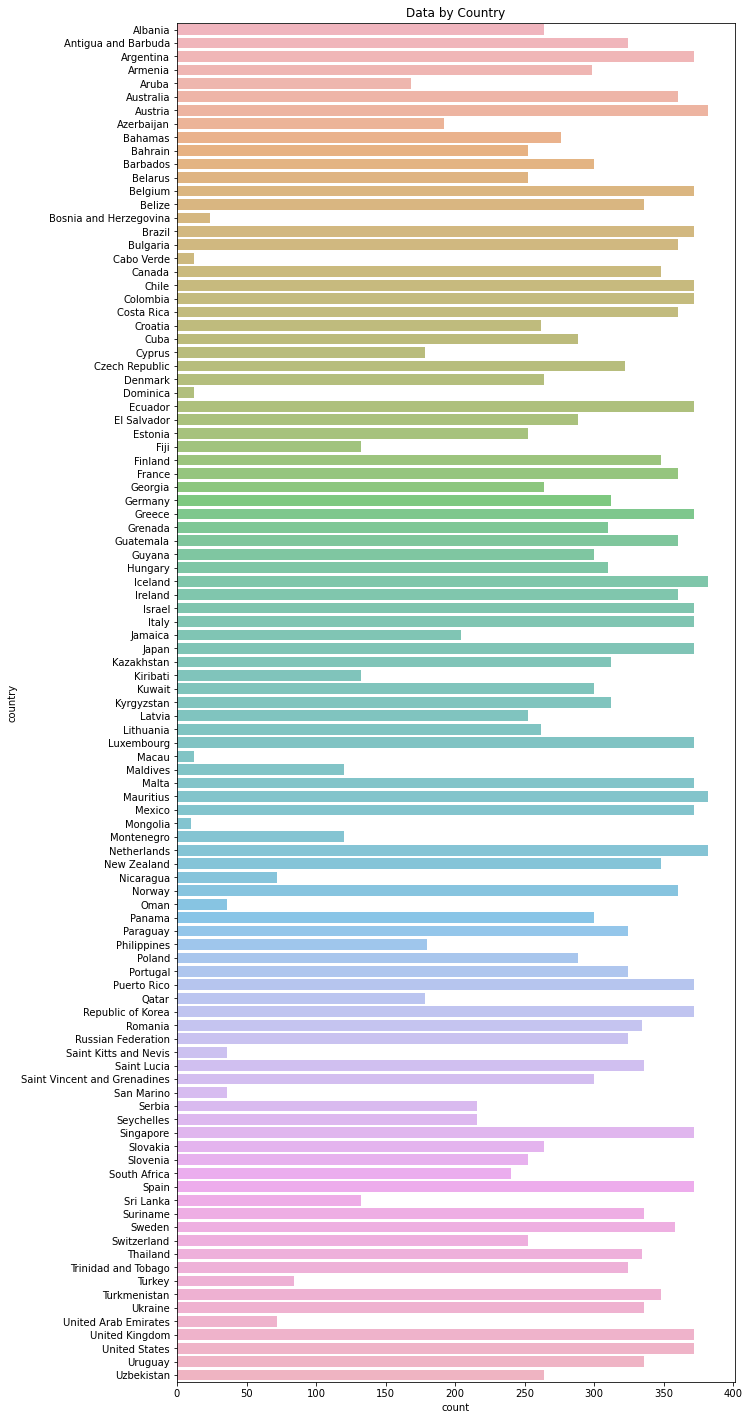

In [6]:
#국가 확인
alpha=0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country',data=dataset,alpha=alpha)
plt.title('Data by Country')
plt.show()

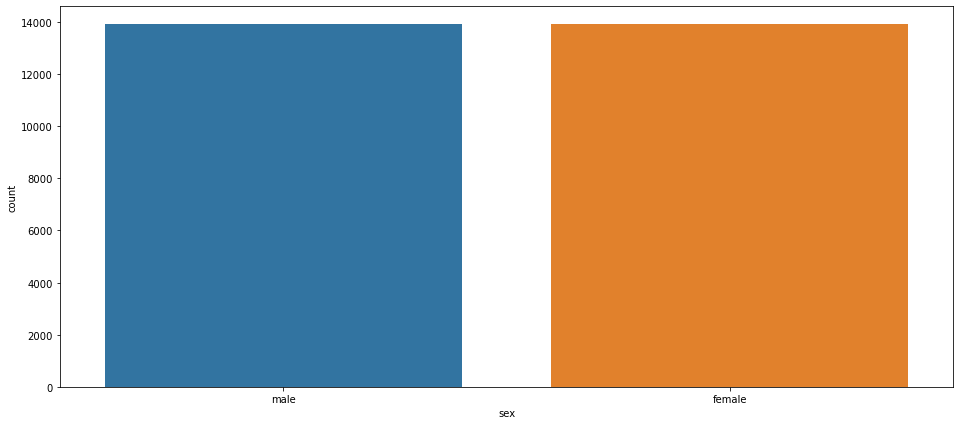

In [7]:
#성별에 따른 데이터 체크
plt.figure(figsize=(16,7))
sex=sns.countplot(x='sex',data=dataset)

In [13]:
dataset[['sex','year']].groupby(['sex']).count() #남녀 같은 수인지 확인

,year
sex,
female,13910
male,13910


데이터 간에 상관 관계를 살펴보겠습니다.

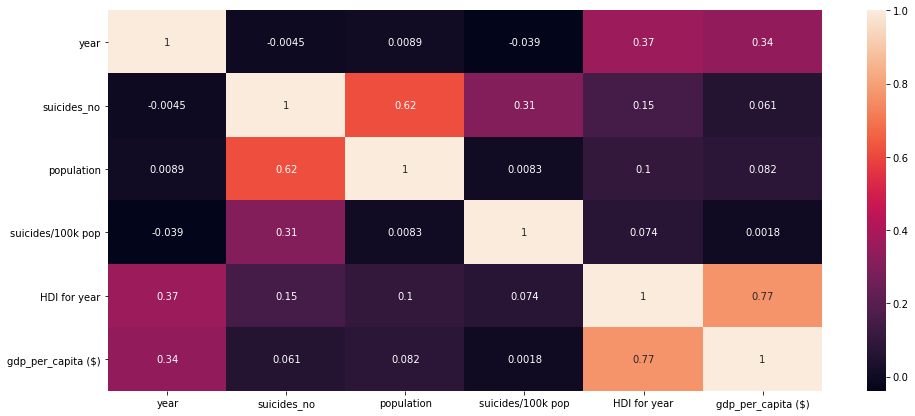

In [17]:
plt.figure(figsize=(16,7))
cor=sns.heatmap(dataset.corr(),annot=True)

이제 가장 많이 자살하는 사람들의 나이를 볼 수 있습니다, 우리는 그것을 위해 바플롯을 사용할 것입니다.

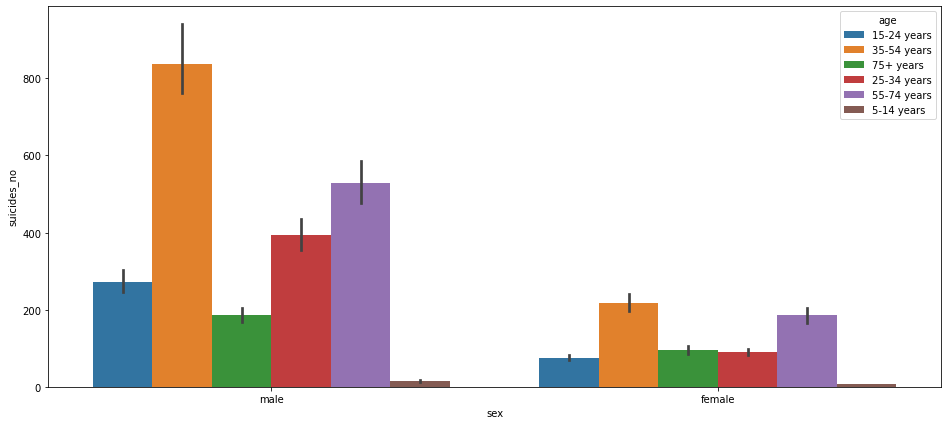

In [18]:
plt.figure(figsize=(16,7))
bar_age=sns.barplot(x='sex',y='suicides_no',hue='age',data=dataset)

그래프에 따르면 35-54세 사이 사람들의 자살률이 가장 높음"

Catplot 위의 catplot을 플롯하자 1985년부터 2016년까지 매년 다른 연령대의 남성과 여성 모두의 자살 수를 보여줍니다.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


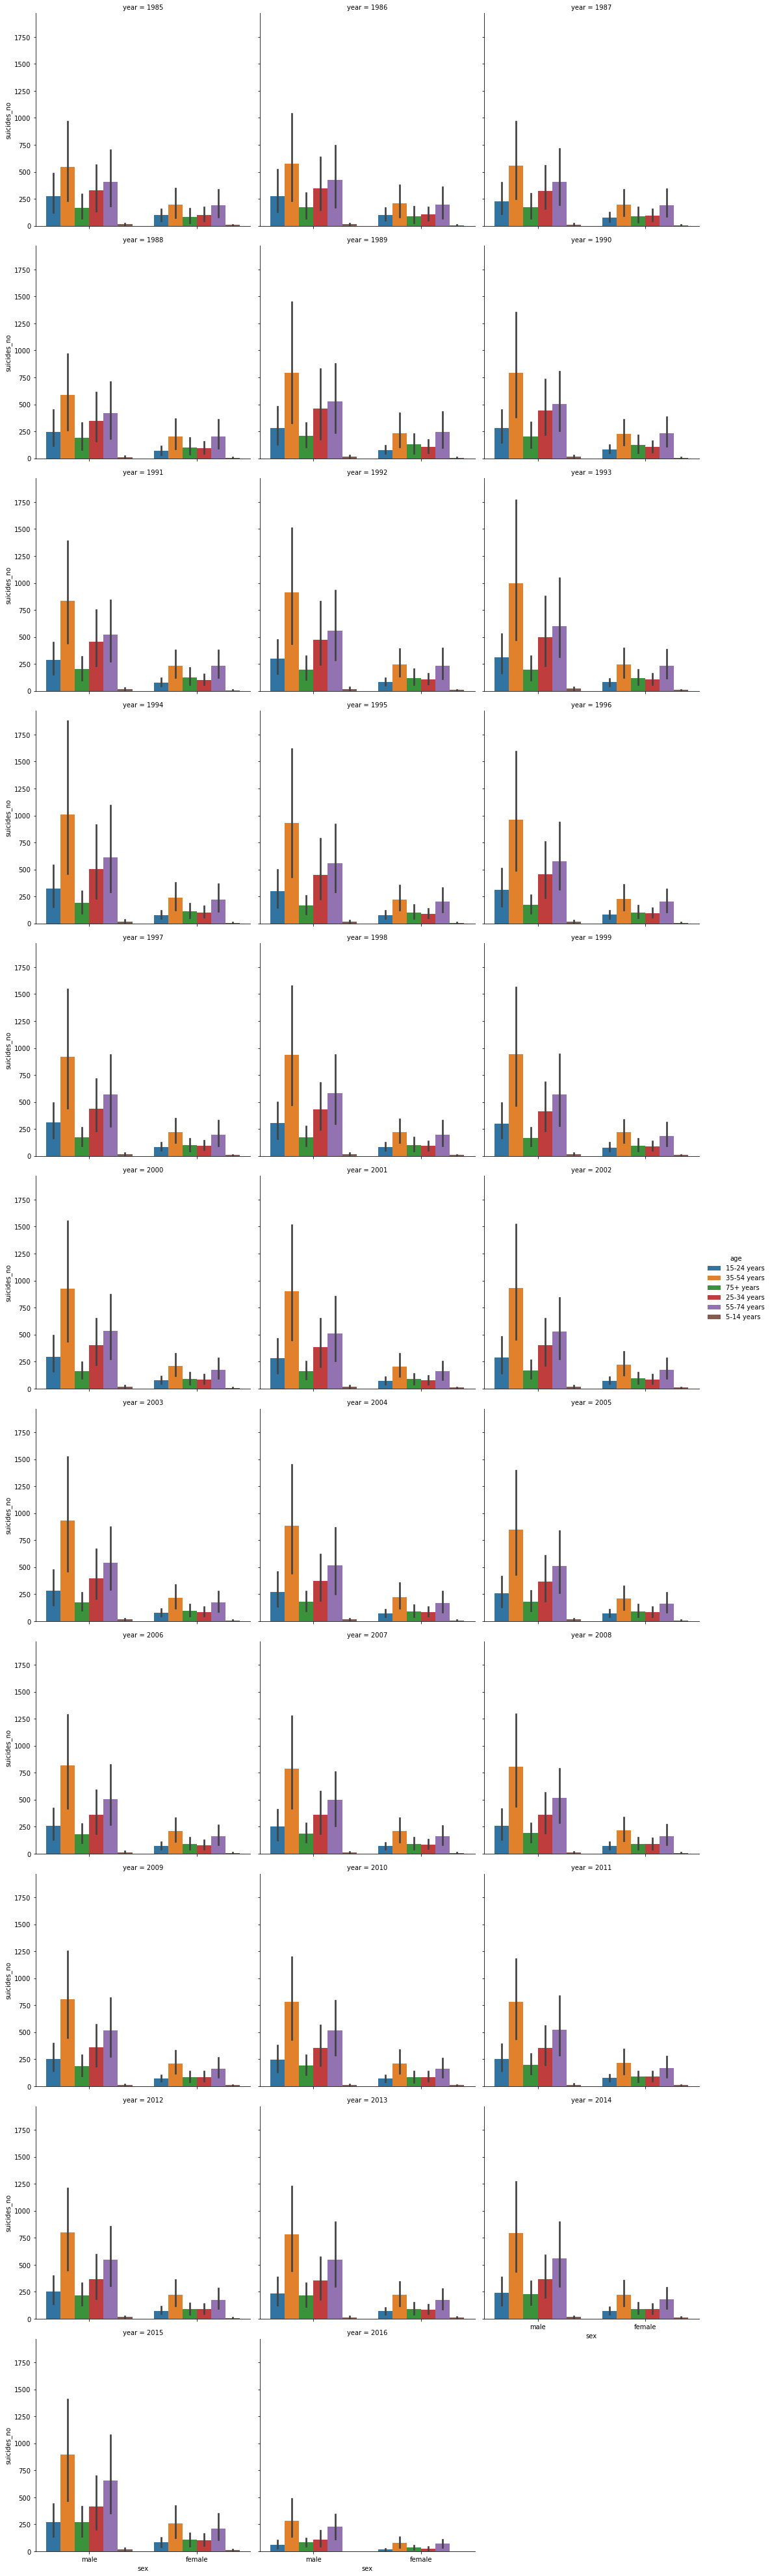

In [19]:
cat_accord_year=sns.catplot('sex','suicides_no',hue='age',col='year',data=dataset,kind='bar',col_wrap=3)

이제 연령대와 함께 연도에 따라 자살 수를 볼 수있는 라인 플롯을 만듭니다.

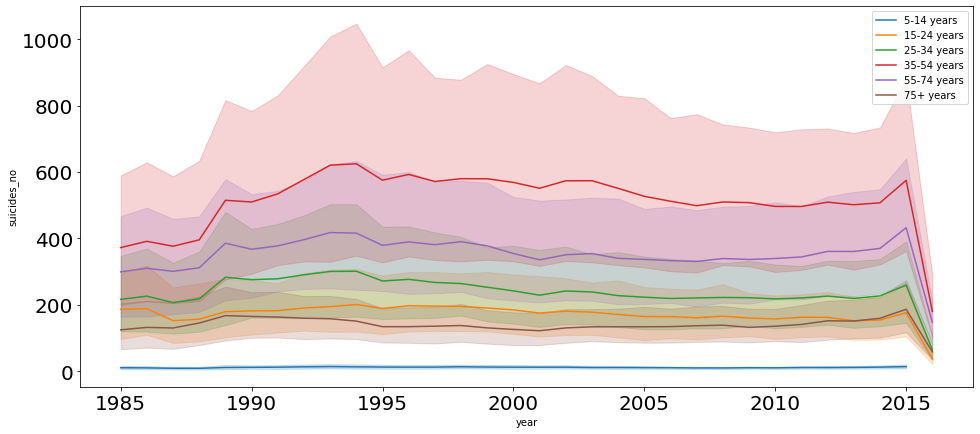

In [22]:
age_5=dataset.loc[dataset.loc[:,'age']=='5-14 years',:]
age_15=dataset.loc[dataset.loc[:,'age']=='15-24 years',:]
age_25=dataset.loc[dataset.loc[:,'age']=='25-34 years',:]
age_35=dataset.loc[dataset.loc[:,'age']=='35-54 years',:]
age_55=dataset.loc[dataset.loc[:,'age']=='55-74 years',:]
age_75=dataset.loc[dataset.loc[:,'age']=='75+ years',:]

plt.figure(figsize=(16,7))

age_5_lp=sns.lineplot(x='year',y='suicides_no',data=age_5)
age_15_lp=sns.lineplot(x='year',y='suicides_no',data=age_15)
age_25_lp=sns.lineplot(x='year',y='suicides_no',data=age_25)
age_35_lp=sns.lineplot(x='year',y='suicides_no',data=age_35)
age_55_lp=sns.lineplot(x='year',y='suicides_no',data=age_55)
age_75_lp=sns.lineplot(x='year',y='suicides_no',data=age_75)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
leg=plt.legend(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])

이제 남성 및 여성 인구에 대한 줄거리 만들기

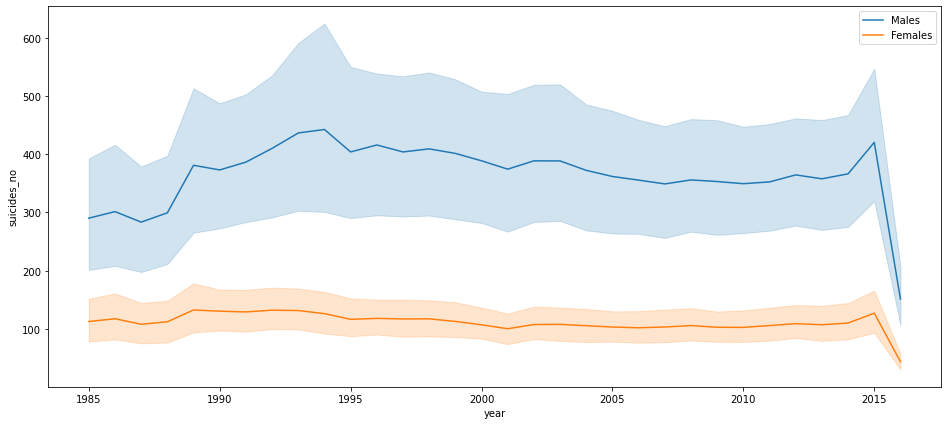

In [23]:
male_population=dataset.loc[dataset.loc[:,'sex']=='male',:]
female_population=dataset.loc[dataset.loc[:,'sex']=='female',:]

plt.figure(figsize=(16,7))

lp_male=sns.lineplot(x='year',y='suicides_no',data=male_population)
lp_female=sns.lineplot(x='year',y='suicides_no',data=female_population)
leg1=plt.legend(['Males','Females'])